<p><span style="font-size: 22px; color: rgb(0, 0, 0);"></span><span style="font-size: 22px; color: rgb(41, 105, 176);"><strong>Recommendation System Using Surprise Package</strong></span></p>

In [1]:
#importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#ignoring deprecation warnings

import warnings
warnings.filterwarnings("ignore")

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics).</span></p>

In [3]:
#creating dataframe

df =pd.read_csv('ratings_Electronics.csv',names=['UserID','ProductID','Rating','Timestamp'])

In [4]:
df.info() #UserID and ProductID are type Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserID     object 
 1   ProductID  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
df.head()

,UserID,ProductID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
df.describe()

,Rating,Timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


**The maximum rating is 5 and minimum rating is 1.We do not need the timestamp column for our final model building, so we will drop it.**

In [7]:
df.drop('Timestamp',axis=1,inplace=True)  #Dropping Timestamp Column

In [8]:
df.head()

,UserID,ProductID,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [9]:
df.shape

(7824482, 3)

In [10]:
df['Rating'].nunique()

5

In [11]:
df['UserID'].nunique()

4201696

In [12]:
df['ProductID'].nunique()

476002

**As we can see that in the given dataset there are 4201696 Unique Users who have rated 476002 Unique Items.**

In [13]:
df.isnull().sum()   #There are no NULL or missing values

UserID       0
ProductID    0
Rating       0
dtype: int64

In [14]:
#Getting the count of Users who have rated each item.
df1=pd.pivot_table(df,aggfunc='count',columns=['ProductID'],values=['UserID']).T

#Getting the mean rating received for each item.
df2=pd.pivot_table(df,aggfunc='mean',columns=['ProductID'],values=['Rating']).T

In [15]:
#Final dataframe for each item with user count and Rating mean.

df3=pd.concat((df1,df2),axis=1)
df3.head()

,UserID,Rating
ProductID,,
0132793040,1,5.000000
0321732944,1,5.000000
0439886341,3,1.666667
0511189877,6,4.500000
0528881469,27,2.851852


In [16]:
df3.sort_values(by='UserID',ascending=False)   #Sorting the items which recived ratings by maximum no. of users

,UserID,Rating
ProductID,,
B0074BW614,18244,4.491504
B00DR0PDNE,16454,3.931020
B007WTAJTO,14172,4.424005
B0019EHU8G,12285,4.754497
B006GWO5WK,12226,4.314657
...,...,...
B004WL91KI,1,4.000000
B004WL9FK4,1,1.000000
B004WL9Q2Q,1,4.000000


In [17]:
df3.sort_values(by='Rating',ascending=False)    #Sorting the items which recived maximum user ratings.

,UserID,Rating
ProductID,,
0132793040,1,5.0
B004SGH244,1,5.0
B004SQBRRM,1,5.0
B004SQC6O0,1,5.0
B004SQE6YI,1,5.0
...,...,...
B0001FC5IE,1,1.0
B00465T6KK,1,1.0
B001W1X0LW,1,1.0


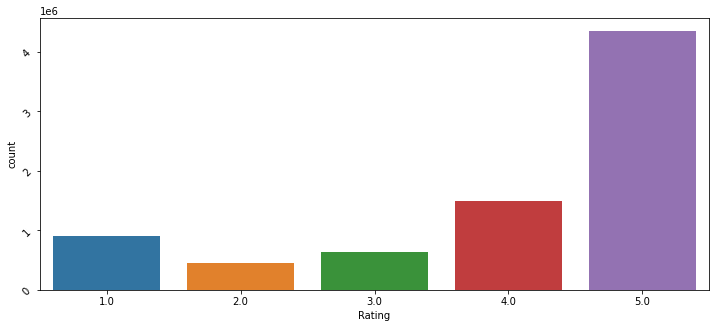

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64


In [18]:
plt.figure(figsize=(12,5))
sns.countplot(df['Rating'])
plt.yticks(rotation=45)
plt.show()
print(df['Rating'].value_counts())

**As is evident from the count graph for each rating from 1-5 , a large no. of items received 5 ratings which is more than the combined ratings of all other items.**

In [19]:
df4=pd.pivot_table(df,aggfunc='count',columns=['UserID'],values=['Rating']).T.sort_values(by='Rating',ascending=False)

In [20]:
df4.head()   #dataframe with user count of ratings by each user

,Rating
UserID,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406


<p><span style="font-size: 19px; color: rgb(41, 105, 176);">2. Take a subset of the dataset to make it less sparse/ denser. ( For example,
keep the users only who has given 50 or more number of ratings ) </span></p>

In [21]:
df4[df4['Rating']<50]=np.NaN    #replacing all user ratings with NaN

In [22]:
df5= df4.dropna()   #dropping all users with rating count less than 50

In [23]:
df5   #checking dataframe to see that only users with more than or equal to 50 ratings are included

,Rating
UserID,
A5JLAU2ARJ0BO,520.0
ADLVFFE4VBT8,501.0
A3OXHLG6DIBRW8,498.0
A6FIAB28IS79,431.0
A680RUE1FDO8B,406.0
...,...
A2WDCAMKCCP1UR,50.0
A319Y83RT0MRVR,50.0
A2RGA7UGAN3UL7,50.0


In [24]:
df6 = pd.merge(left=df, right=df5, left_on='UserID', right_on='UserID')
df6   #getting the original dataframe but only for users with more than or equal to 50 ratings.            

,UserID,ProductID,Rating_x,Rating_y
0,A3BY5KCNQZXV5U,0594451647,5.0,50.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50.0
2,A3BY5KCNQZXV5U,B000063574,5.0,50.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50.0
...,...,...,...,...
125866,A328S9RN3U5M68,B00JGL37FO,5.0,76.0
125867,A328S9RN3U5M68,B00K00FN3O,5.0,76.0
125868,A328S9RN3U5M68,B00L21HC7A,5.0,76.0
125869,A328S9RN3U5M68,B00L2442H0,5.0,76.0


In [25]:
#Dropping unnecessary column Rating_y

df6.drop('Rating_y',inplace=True,axis=1)
df6.info()
df6

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 0 to 125870
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UserID     125871 non-null  object 
 1   ProductID  125871 non-null  object 
 2   Rating_x   125871 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


,UserID,ProductID,Rating_x
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0
...,...,...,...
125866,A328S9RN3U5M68,B00JGL37FO,5.0
125867,A328S9RN3U5M68,B00K00FN3O,5.0
125868,A328S9RN3U5M68,B00L21HC7A,5.0
125869,A328S9RN3U5M68,B00L2442H0,5.0


In [26]:
#Getting UserID counts and Rating means for our dataframe with more than 49 ratings.

data1=pd.pivot_table(df6,aggfunc='count',columns=['ProductID'],values=['UserID']).T
data2=pd.pivot_table(df6,aggfunc='mean',columns=['ProductID'],values=['Rating_x']).T

In [27]:
data3=pd.concat((data1,data2),axis=1)
data3.head()

,UserID,Rating_x
ProductID,,
0594451647,1,5.000000
0594481813,1,3.000000
0970407998,2,2.500000
0972683275,4,4.750000
1400501466,6,3.333333


In [28]:
data3.sort_values(by='UserID',ascending=False)  #Product with number of users that have given ratings and mean ratings received

,UserID,Rating_x
ProductID,,
B0088CJT4U,206,4.218447
B003ES5ZUU,184,4.864130
B000N99BBC,167,4.772455
B007WTAJTO,164,4.701220
B00829TIEK,149,4.436242
...,...,...
B001UVCYN4,1,5.000000
B001UW7YDS,1,5.000000
B001UWKP0M,1,2.000000


In [29]:
data3.sort_values(by='Rating_x',ascending=False)  #Sorted mean ratings 

,UserID,Rating_x
ProductID,,
0594451647,1,5.0
B003RRY9RS,1,5.0
B003RR95Q8,1,5.0
B003RIPMZU,1,5.0
B003RFRNYQ,2,5.0
...,...,...
B000IZ8GKS,1,1.0
B000C77B4O,1,1.0
B008EVTDFK,1,1.0


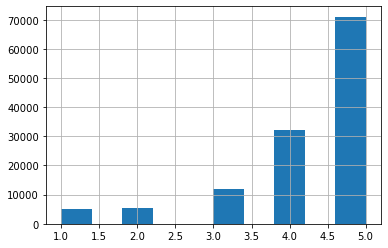

In [31]:
df6['Rating_x'].hist() #Histogram plot

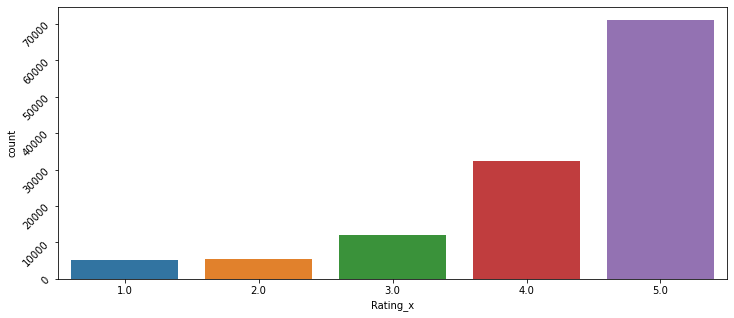

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: Rating_x, dtype: int64


In [30]:
plt.figure(figsize=(12,5))
sns.countplot(df6['Rating_x'])
plt.yticks(rotation=45)
plt.show()
print(df6['Rating_x'].value_counts())

**The ratings ratio has changed after dropping the users that have given fewer than 50 ratings. It implies that a lot of users had given fewer items very high ratings causing a high count of 5 ratings.While in the original dataset the no. of products that received 1 rating was more than 2. Here we see that the count of each rating is steadily increasing.**

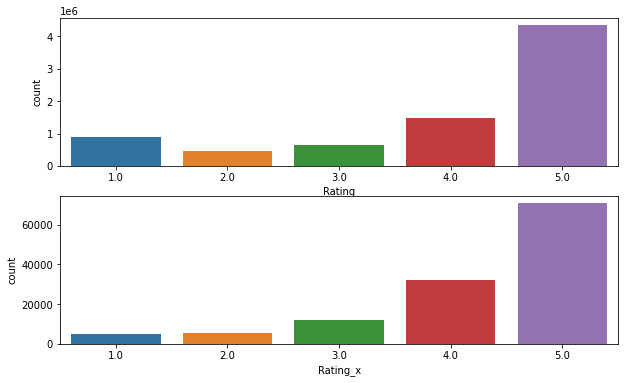

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64
5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: Rating_x, dtype: int64


In [32]:
#Comparative graph of count of ratings before and after dropping the users with fewer ratings.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[10,6])
g1 = sns.countplot(x='Rating', data=df, ax=ax1)
g2 = sns.countplot(x='Rating_x', data=df6, ax=ax2)
plt.show()
print(df['Rating'].value_counts())
print(df6['Rating_x'].value_counts())

In [33]:
data4=pd.pivot_table(df6,aggfunc='count',columns=['UserID'],values=['Rating_x']).T.sort_values(by='Rating_x',ascending=False)
data4    #checking count of each users numer of ratings to ensure we have not lost unintended data

,Rating_x
UserID,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
...,...
A2ER8G4JJJ7XER,50
A2F4HP0J5VNOYR,50
A17RFKCYS69M3Y,50


In [34]:
df6   #The final dataframe we will use in our recommendation system

,UserID,ProductID,Rating_x
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0
...,...,...,...
125866,A328S9RN3U5M68,B00JGL37FO,5.0
125867,A328S9RN3U5M68,B00K00FN3O,5.0
125868,A328S9RN3U5M68,B00L21HC7A,5.0
125869,A328S9RN3U5M68,B00L2442H0,5.0


In [35]:
df6.shape

(125871, 3)

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">3. Build Popularity Recommender model. </span></p>

In [36]:
#Recommendation System
data3.sort_values(by='Rating_x',ascending=False).head()

,UserID,Rating_x
ProductID,,
0594451647,1,5.0
B003RRY9RS,1,5.0
B003RR95Q8,1,5.0
B003RIPMZU,1,5.0
B003RFRNYQ,2,5.0


**As we can see that above is a Popularity based Recommender model.It is clear that all of the 5 recommendations made to the user are only rated by just 1 or 2 people. So this is not an appropriate model to use for recommending products as we arenot sure if these products are in any way of interest to the customer or if the high rating is given by peculiar customers interested in these outlier products. The number of fewer ratings makes it very clear that these are actually not very popular among the customers.**

In [37]:
from surprise import Dataset    #Usually required fo loading built in datasets
from surprise import accuracy
from surprise import Reader     #read a given dataset with three values USERID,ITEMID,RATING into Surprise dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split  #Splitiing a surprise dataset

In [38]:
seed=232  #Random seed 

reader = Reader(rating_scale=(1, 5))  #initializing surprise reader module to read the dataframe to surprise data model
data_30_pct=df6.sample(frac=0.3,random_state=seed)   #due to memeory concerns using only random 30% of given data 
data = Dataset.load_from_df(data_30_pct[['UserID', 'ProductID', 'Rating_x']],reader)  #reding data to surprise dataform

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">4. Split the data randomly into a train and test dataset. ( For example, split it in
70/30 ratio)  </span></p>

In [39]:
trainset, testset = train_test_split(data, test_size=.30) #Splitting data to 70/30 using surprise package

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">5. Build Collaborative Filtering model.  </span></p>

In [40]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(trainset)


algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [41]:
# run the trained model against the testset
test_pred_item = algo_item.test(testset)
test_pred_user = algo_user.test(testset)

In [42]:
test_pred_item

[Prediction(uid='A1JUBRIZMO0RJV', iid='B001FA1NZU', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2NOW4U7W3F7RI', iid='B000U5A7O4', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1L5TA5UQF7EWE', iid='B001B077PO', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ARIDN94LOCQFD', iid='B004H1R7KY', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1SX9PHJWTDMF9', iid='B002FPLE3U', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1VQHH85U7PX0', iid='B003IE49T8', r_ui=3.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3HR0ZZOFKQ97N', iid='B002CGRR8I', r_ui=5.0, est=4.269521791767555, details={'was_impossible'

In [43]:
test_pred_user

[Prediction(uid='A1JUBRIZMO0RJV', iid='B001FA1NZU', r_ui=5.0, est=4.545454545454546, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2NOW4U7W3F7RI', iid='B000U5A7O4', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1L5TA5UQF7EWE', iid='B001B077PO', r_ui=5.0, est=3.5714285714285716, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ARIDN94LOCQFD', iid='B004H1R7KY', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1SX9PHJWTDMF9', iid='B002FPLE3U', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1VQHH85U7PX0', iid='B003IE49T8', r_ui=3.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3HR0ZZOFKQ97N', iid='B002CGRR8I', r_ui=5.0, est=4.2695217917675

In [44]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 1.1250


1.125011916055391

In [45]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_user, verbose=True)

User-based Model : Test Set
RMSE: 1.0433


1.0433097777580222

**As we can see that RMSE Error for User-User based model is better than Item-item based  collaborative filtering model.But since we have used only a part of the original dataframe and also run only a single iteration of learning this result could be a fluke. To prevent this we will measure performance of various models and conduct multiple iterations.**

<p><span style="color: rgb(0, 0, 0); font-size: 18px;">Below we will be using all available algorithms with the surprise package for Recommendation system and check their RMSE and MAE using the built in cross validation method in Surprise Package. This will help us in contrast and compare the various models that we can use for our final model building and item recommendation.</span></p>

In [46]:
#Use Normal Predictor
from surprise import NormalPredictor

### Use BaselineOnly
from surprise import BaselineOnly


### Collaborative filtering using Base Edition
from surprise import KNNBasic


### Using Mean Collaborative Filtering
from surprise import KNNWithMeans



### Using collaborative filtering baseline
from surprise import KNNBaseline

### Using SVD
from surprise import SVD


### Using SVD++
from surprise import SVDpp


### Using NMF
from surprise import NMF


<p><span style="font-size: 19px; color: rgb(41, 105, 176);">6. Evaluate the above model. ( Once the model is trained on the training data, it
can be used to compute the error (like RMSE) on predictions made on the test
data.) You can also use a different method to evaluate the models.  </span></p>

In [47]:
benchmark = []
# Iterate over all algorithms
for algorithm in [NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True}),KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False}),BaselineOnly(),SVD(),SVDpp(),NMF()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
dataframe=pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 
dataframe

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVDpp,0.999686,0.746203,33.030146,0.520532
SVD,1.000648,0.752332,4.547743,0.171586
BaselineOnly,1.000830,0.762259,0.221941,0.107790
KNNBaseline,1.033448,0.772871,0.340506,0.252460
KNNWithMeans,1.045559,0.795940,0.463104,0.195777
KNNBasic,1.090272,0.830926,0.125700,0.212031
KNNWithMeans,1.128951,0.818230,31.900225,0.782474
NMF,1.174545,0.912953,8.120914,0.169390
NormalPredictor,1.359429,1.021195,0.108065,0.188668


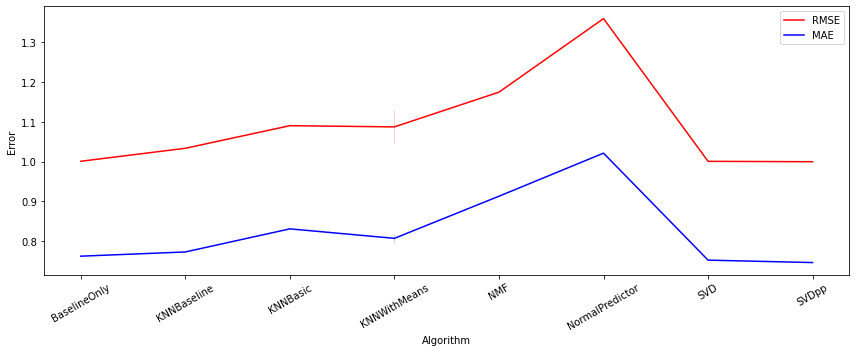

In [57]:
dataframe= pd.DataFrame(benchmark).sort_values('test_rmse')
dataframe
plt.figure(figsize=(12,5))
sns.lineplot(x='Algorithm',y='test_rmse',data=dataframe,color='r',label='RMSE')
sns.lineplot(x='Algorithm',y='test_mae',data=dataframe,color='b',label='MAE')
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel('Error')
plt.show()

**The  SVD has best performance and NormalPredictor has worst performance as shown above.The KNNWith means helps us choose between user-user vs item-item collaboration and hence we will use it for our final model building.**

In [49]:
# Recommendation steps for related movies based on the training model: KKNWithMeans - User-User Collaborative filtering
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [50]:
# run the trained model against the testset
test_pred_user = algo_user.test(testset)

In [51]:
test_pred_user

[Prediction(uid='A1JUBRIZMO0RJV', iid='B001FA1NZU', r_ui=5.0, est=4.545454545454546, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2NOW4U7W3F7RI', iid='B000U5A7O4', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1L5TA5UQF7EWE', iid='B001B077PO', r_ui=5.0, est=3.5714285714285716, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ARIDN94LOCQFD', iid='B004H1R7KY', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1SX9PHJWTDMF9', iid='B002FPLE3U', r_ui=5.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1VQHH85U7PX0', iid='B003IE49T8', r_ui=3.0, est=4.269521791767555, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3HR0ZZOFKQ97N', iid='B002CGRR8I', r_ui=5.0, est=4.2695217917675

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new
products to each user based on his/her habits, we will recommend 5 new
products.  </span></p>

In [52]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=5):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an KNNMeans algorithm on the movielens dataset.
data = data
trainset = trainset
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo_user.test(testset)

top_n = get_top_n(predictions, n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
A1MFPAM9TTRTXN ['B005HFJFHW', 'B009AR2MFK', 'B001026U0Q', 'B005O81U8Y', 'B004MKNJ84']
A3CP3J7OEGQMD5 ['B002XT1CJE', 'B009AR2MFK', 'B001026U0Q', 'B005O81U8Y', 'B004MKNJ84']
A2BCDZO1XQLDH ['B002XT1CJE', 'B005HFJFHW', 'B001026U0Q', 'B005O81U8Y', 'B004MKNJ84']
AWNJAY0M5UI70 ['B000UWYM5C', 'B001212ELY', 'B002OEBNJC', 'B005DJNRQM', 'B00009ZWC8']
AT28RL25Q2OLK ['B0013FRNKG', 'B000YA4PPW', 'B003AILH6U', 'B001AW8W7A', 'B001T9NUJE']
A2LCE1D0TW2XY0 ['B00894YP00', 'B00829TIEK', 'B00862522A', 'B0058G40O8', 'B002L60TTI']
A24J2Y1O22JYZX ['B002XT1CJE', 'B005HFJFHW', 'B009AR2MFK', 'B001026U0Q', 'B005O81U8Y']
A3V7D0LH8L7BG0 ['B001A4LVYY', 'B008DWCRQW', 'B0015DYMVO', 'B0019F8MEG', 'B009SYZ8OC']
A2SL5IW096Z2BL ['B002XT1CJE', 'B005HFJFHW', 'B009AR2MFK', 'B001026U0Q', 'B005O81U8Y']
A30KPB2ILF6K6J ['B003WV8PKG', 'B00310PJM0', 'B000ETY3LO', 'B00D695GS8', 'B00E9646MY']
AN2IZT80ZUNJN ['B002XT1CJE

**As we can see that above we have given recommendation to each user for 5 products based on KNN Means neighbours alogorithm using user-user algo.**

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">8. Summarise your insights.  </span></p>

In [60]:
dataframe.set_index('Algorithm')

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVDpp,0.999686,0.746203,33.030146,0.520532
SVD,1.000648,0.752332,4.547743,0.171586
BaselineOnly,1.000830,0.762259,0.221941,0.107790
KNNBaseline,1.033448,0.772871,0.340506,0.252460
KNNWithMeans,1.045559,0.795940,0.463104,0.195777
KNNBasic,1.090272,0.830926,0.125700,0.212031
KNNWithMeans,1.128951,0.818230,31.900225,0.782474
NMF,1.174545,0.912953,8.120914,0.169390
NormalPredictor,1.359429,1.021195,0.108065,0.188668


<p style='margin-top:0in;margin-right:0in;margin-bottom:8.0pt;margin-left:0in;line-height:107%;font-size:15px;font-family:"Calibri",sans-serif;'>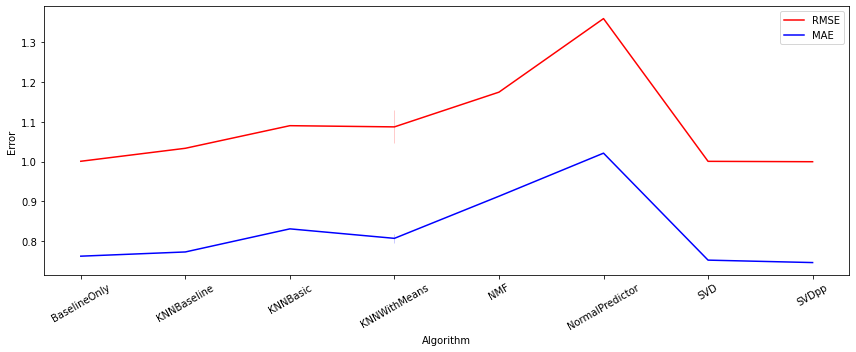<br></p>

<p><span style="color: rgb(41, 105, 176); font-size: 19px;">---&gt; Popularity based models are not good recommendations systems as some items with which are highly popular with outlier users are recommended to the every other user.These products may not neccessarily be popular among massess and also not related to the other products the user may be interested in.</span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><br></span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;">---&gt; Popularity based models solve the problem of recommending items to new users but a hybrid system which also takes into account the count of ratings for each item would be better than a model entirely based on popularity.</span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><br></span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;">---&gt; A collaborative model is based on nearness between the users or items. It is a memory based model implyting that it uses historic information of both users and items to recommend products.</span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><br></span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;">---&gt;As we can see in the above table , different models were used to assess their efficacy for building our final recommendation model.The SVD and SVDpp are matrix based systems and are higly efficient in terms of accuracy.These have minimum errors both RMSE and MAE.But SVDpp has high time requirement.</span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><br></span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;">----&gt;We can use any of the models as shown above to build our final model but not all of them give the freedom to choose between user-user and item-item algo.Hence we will be using the most popular algorithm used in recommendation systems namely the KNNWithMeans algorithm.</span></span></p>
<p><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><br></span></span></p>
<p><span style="color: rgb(41, 105, 176); font-size: 19px;">---&gt; Our model recommends the nearest neighbours of the products based on user activity.</span></p>

<p><span style="color: rgb(41, 105, 176); font-size: 20px;">--------------------------------------------------------------Thank You---------------------------------------------------------------</span></p>